In [1]:
exec(open("init_notebook.py").read())
%load_ext autoreload
%autoreload 2

current working dirC:\muktadir\netmad\netmad


In [2]:
from sim.Simulator import Simulator
from model.Sender import Sender
from model.Path import Path
from model.SimpleQueuePath import SimpleQueuePath
from model.NoobSender import NoobSender
import pprint
import logging
logging.basicConfig(level=logging.INFO)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [24]:
path = SimpleQueuePath(avgTTL=20, noiseMax=20, maxDataInPipe=10, maxQsize=10000, debug=True)
simulator = Simulator(path, printStatFreq=20)
deliveryRate = 25
sender = NoobSender(simulator.createSenderId(), deliveryRate, debug=False)
simulator.senders[sender.id] = sender
simulator.run(1000)


INFO:root:SimpleQueuePath: 20 incoming packets
INFO:root:SimpleQueuePath: 16 incoming packets
INFO:root:SimpleQueuePath: 13 incoming packets
INFO:root:SimpleQueuePath: 19 incoming packets
INFO:root:SimpleQueuePath: 23 incoming packets
INFO:root:SimpleQueuePath: 14 incoming packets
INFO:root:SimpleQueuePath: 12 incoming packets
INFO:root:SimpleQueuePath: 24 incoming packets
INFO:root:SimpleQueuePath: 21 incoming packets
INFO:root:SimpleQueuePath: 12 incoming packets
INFO:root:SimpleQueuePath: 15 incoming packets
INFO:root:SimpleQueuePath: 21 incoming packets
INFO:root:SimpleQueuePath: 16 incoming packets
INFO:root:SimpleQueuePath: 22 incoming packets
INFO:root:SimpleQueuePath: 19 incoming packets
INFO:root:SimpleQueuePath: 22 incoming packets
INFO:root:SimpleQueuePath: 24 incoming packets
INFO:root:SimpleQueuePath: 27 incoming packets
INFO:root:SimpleQueuePath: 21 incoming packets
INFO:root:
************Time step: 20*********
INFO:root:SimpleQueuePath: 21 incoming packets
INFO:root:Pack

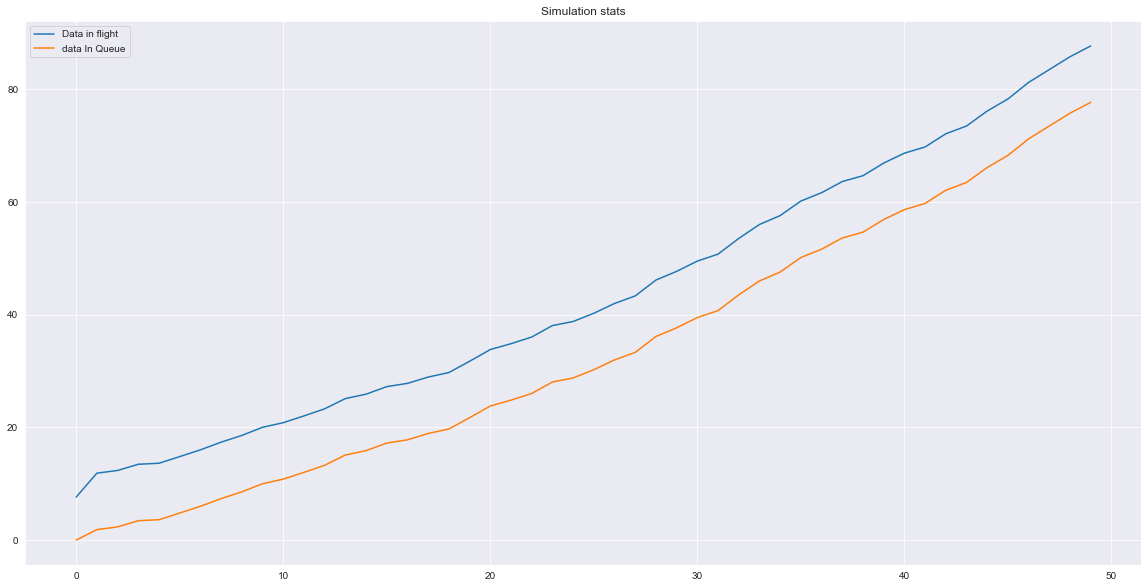

In [26]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], label="Data in flight")
plt.plot(simulator.stats['dataInQueue'], label="data In Queue")
# plt.plot(simulator.stats['packetsInFlight'], label="Packet in flight")
# plt.plot(simulator.stats['packetsInQueue'], label="packets In Queue")
# plt.plot(simulator.stats['packetsSent'], label="Packets Sent")
# plt.plot(simulator.stats['packetsAcked'], label="Packet Acked")
# plt.plot(simulator.stats['totalPacketsSent'], label="Total packets Sent")
# plt.plot(simulator.stats['totalPacketsAcked'], label="Total packet Acked")
plt.title("Simulation stats")
plt.legend()
plt.show()


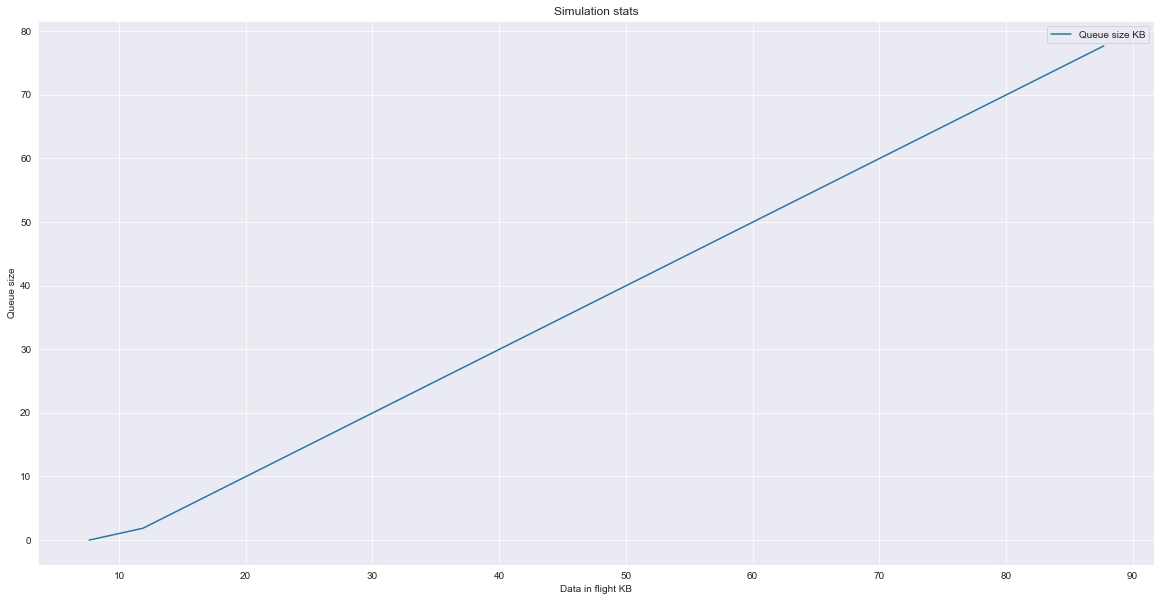

In [28]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], simulator.stats['dataInQueue'], label="Queue size KB")
plt.title("Simulation stats")
plt.xlabel("Data in flight KB")
plt.ylabel("Queue size KB")
plt.legend()
plt.show()

In [7]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
packetStats = analyzerTools.createDfFromPackets(sender.ackedPackets)

<AxesSubplot:xlabel='ttl', ylabel='Count'>

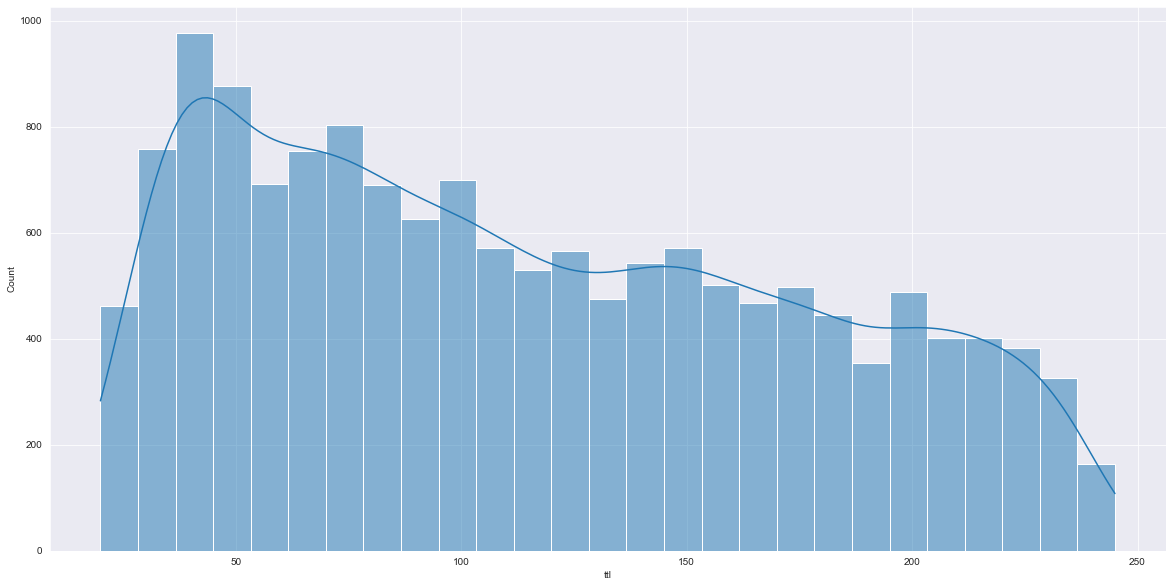

In [8]:

plt.figure(figsize=(20,10))
sns.histplot(packetStats.ttl, kde=True)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='packNum', ylabel='ttl'>

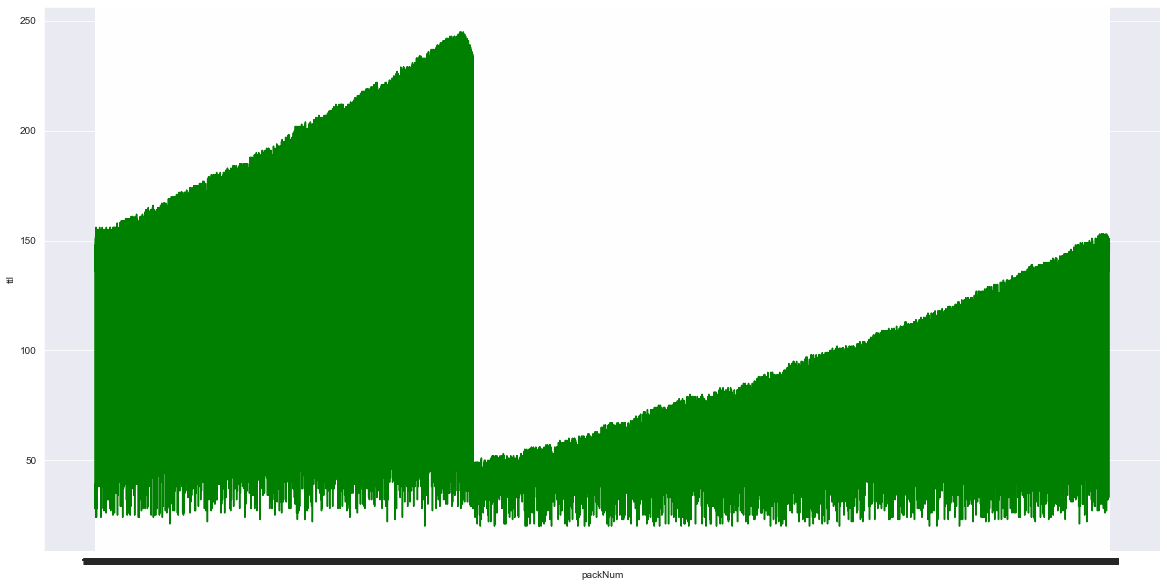

In [9]:

plt.figure(figsize=(20,10))
sns.lineplot(data = packetStats, x='packNum', y='ttl', color='g')

In [11]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
dfPackets = analyzerTools.createDfFromPackets(sender.ackedPackets)

In [12]:
dfPackets.head()

,packNum,ttl,ttlNoise,sentAt,ackAt,isDropped
0,1,31,11,1,32,False
1,10,28,8,1,29,False
2,100,39,19,6,45,False
3,1000,31,7,55,86,False
4,10000,144,9,504,648,False


In [13]:
dfStats = analyzerTools.getStatsPerTimeStep(dfPackets)

In [14]:
dfStats.head()

,avgTTL,minTTL,maxTTL
sentAt,,,
1,29.454545,20,39
2,28.266667,20,37
3,31.600000,24,38
4,28.666667,20,39
5,29.550000,20,39


In [15]:
dfStats.tail()

,avgTTL,minTTL,maxTTL
sentAt,,,
764,233.363636,231,236
765,233.000000,231,235
766,234.000000,234,234
767,233.000000,233,233
768,232.000000,232,232


<AxesSubplot:xlabel='sentAt'>

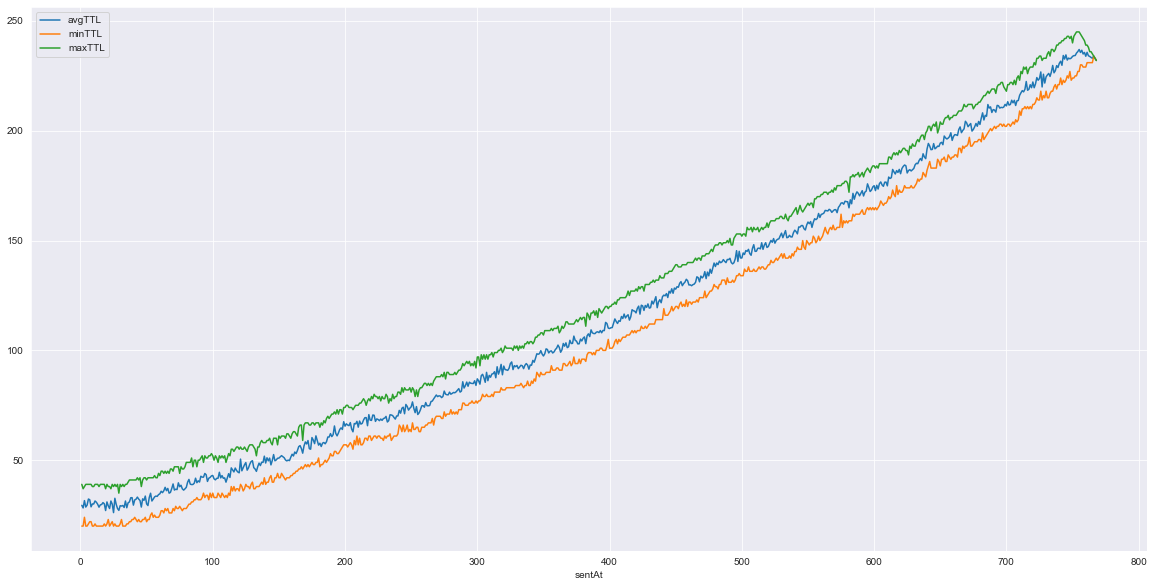

In [16]:
dfStats.plot(figsize=(20,10))

In [17]:
from queue import Queue
q = Queue()
q.put(1)
q.put(2)
q.put(3)
print(q.get())
print(list(q.queue))
for i in q.queue:
    print(i)
print(q.get())
print(q.get())

1
[2, 3]
2
3
2
3


In [18]:
q.queue

deque([])